In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allison.nn.layers import LayerDense
from allison.nn.models import NeuralNetwork
from allison.utils.functions.data import train_test_split
from allison.utils.functions.loss import categorical_cross_entropy
from allison.utils.functions.activation import sigmoid,softmax,relu,tanh
from allison.utils.metrics import accuracy
from allison.utils.functions.transforms import get_numeric_labels
from allison.optimizers.sgd import SGD,SGDMomentum

# Dataset

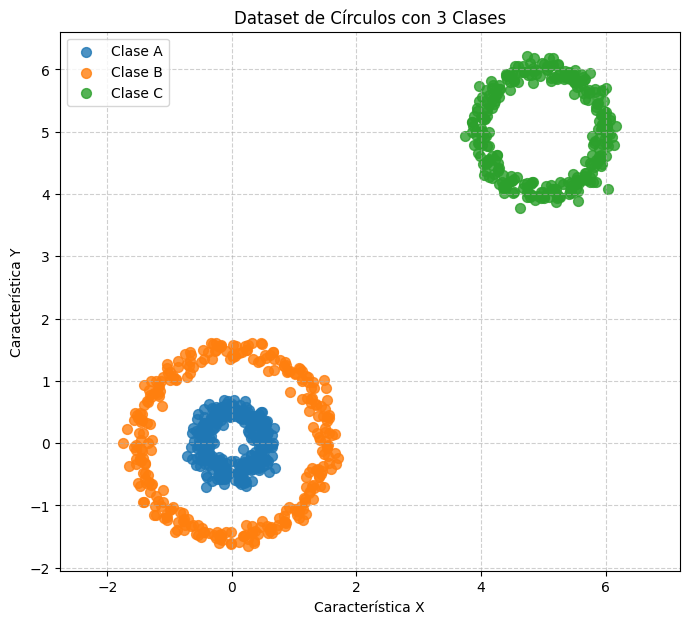

In [15]:
r1 = 0.5  
r2 = 1.5  
r3 = 1  

num_points = 300
thetas = np.linspace(0, 2 * np.pi, num_points) 


x1 = r1 * np.cos(thetas) + 0.1 * np.random.randn(num_points)
y1 = r1 * np.sin(thetas) + 0.1 * np.random.randn(num_points)


x2 = r2 * np.cos(thetas) + 0.1 * np.random.randn(num_points)
y2 = r2 * np.sin(thetas) + 0.1 * np.random.randn(num_points)


x3 = 5 + r3 * np.cos(thetas) + 0.1 * np.random.randn(num_points)
y3 = 5 + r3 * np.sin(thetas) + 0.1 * np.random.randn(num_points)


plt.figure(figsize=(8, 7)) 


plt.scatter(x1, y1, s=50, label="Clase A", alpha=0.8) # Puntos de la Clase A
plt.scatter(x2, y2, s=50, label="Clase B", alpha=0.8) # Puntos de la Clase B
plt.scatter(x3, y3, s=50, label="Clase C", alpha=0.8) # Puntos de la Clase C

plt.xlabel("Característica X") 
plt.ylabel("Característica Y")
plt.title("Dataset de Círculos con 3 Clases")
plt.legend() 
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.show() 

In [16]:
labels_A = ['A' for _ in range(num_points)]
labels_B = ['B' for _ in range(num_points)]
labels_C = ['C' for _ in range(num_points)]

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))
labels = np.concatenate((labels_A, labels_B, labels_C))

df = pd.DataFrame({"x": x, "y": y, "labels": labels})
df

,x,y,labels
0,0.546452,0.059731,A
1,0.443915,-0.002315,A
2,0.650061,-0.029106,A
3,0.448166,0.078356,A
4,0.374051,0.092797,A
...,...,...,...
895,6.017234,4.958655,C
896,6.104008,4.918681,C
897,5.811161,4.823436,C
898,5.880872,5.047193,C


#  Train Two clases

In [17]:
dataset = df[df["labels"].isin(["A", "B"])]
dataset = pd.get_dummies(dataset, columns=["labels"],dtype=int)
data_train, data_test = train_test_split(dataset,test_size=0.2)

independent_variables = ["x", "y"]
dependent_variables = ["labels_A", "labels_B"]


X_train = data_train[independent_variables].to_numpy()
Y_train = data_train[dependent_variables].to_numpy()

X_test = data_test[independent_variables].to_numpy()
Y_test = data_test[dependent_variables].to_numpy()

## Build a Neural Network

In [18]:
model = NeuralNetwork(categorical_cross_entropy,accuracy)
model.add_layer(LayerDense(2,4,tanh))
model.add_layer(LayerDense(4,2,softmax))
model.summary()

Layer:1, neurons:4, input:(n,2), weights:(2,4), output:(n,4), activation:tanh 

Layer:2, neurons:2, input:(n,4), weights:(4,2), output:(n,2), activation:softmax 

Total -> Layers:2, neurons:6, weights:16, bias:6 params:22 

Loss function: categorical_cross_entropy 

Metric: accuracy 



In [19]:
# optimizer = SGD(learning_rate=0.01)
optimizer = SGDMomentum(learning_rate=0.01,momentum=0.9)

In [20]:
steps = 200
iters = 10

accuracy_train = 0
accuracy_test = 0

for step in range(1,steps+1):

    if accuracy_train > 98.0 and accuracy_test > 98.0:
        break
    
    for _ in range(iters):
        output = model.forward(X_train)
        model.backward(output,Y_train,X_train)
        optimizer.update(model)
    
    accuracy_train = model.evaluate(X_train,Y_train)
    accuracy_test = model.evaluate(X_test,Y_test)

    print(f"Step: {step:3d} Train Accuracy: {accuracy_train:7.5f}% Test Accuracy: {accuracy_test:7.5f}%")

Step:   1 Train Accuracy: 84.58333% Test Accuracy: 80.83333%
Step:   2 Train Accuracy: 97.91667% Test Accuracy: 95.00000%
Step:   3 Train Accuracy: 97.50000% Test Accuracy: 98.33333%
Step:   4 Train Accuracy: 99.37500% Test Accuracy: 98.33333%


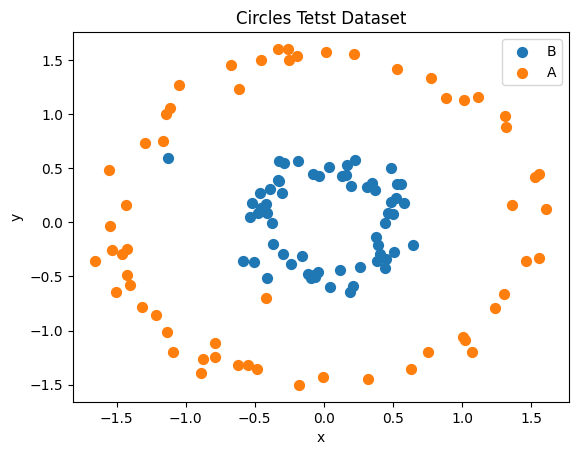

In [21]:
id2label = {0:"B",1:"A"}

predictions = model.predict(X_test)
predictions = get_numeric_labels(predictions)
predictions

data_test['prediction'] = predictions
data_test['pred_labels'] = data_test['prediction'].map(id2label)

for label in data_test['pred_labels'].unique():
    x = data_test[data_test['pred_labels'] == label]['x']
    y = data_test[data_test['pred_labels'] == label]['y']

    plt.scatter(x,y,s=50,label=label)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Tetst Dataset")
plt.legend()

# Train Three Classes

In [22]:
dataset = df
dataset = pd.get_dummies(dataset, columns=["labels"],dtype=int)
data_train, data_test = train_test_split(dataset,test_size=0.2)

independent_variables = ["x", "y"]
dependent_variables = ["labels_A", "labels_B", "labels_C"]


X_train = data_train[independent_variables].to_numpy()
Y_train = data_train[dependent_variables].to_numpy()
print(X_train.shape,Y_train.shape)

X_test = data_test[independent_variables].to_numpy()
Y_test = data_test[dependent_variables].to_numpy()

print(X_test.shape,Y_test.shape)

(720, 2) (720, 3)
(180, 2) (180, 3)


## Build a Neural Network

In [23]:
model = NeuralNetwork(categorical_cross_entropy,accuracy)
model.add_layer(LayerDense(2,4,tanh))
model.add_layer(LayerDense(4,4,tanh))
model.add_layer(LayerDense(4,3,softmax))
model.summary()

Layer:1, neurons:4, input:(n,2), weights:(2,4), output:(n,4), activation:tanh 

Layer:2, neurons:4, input:(n,4), weights:(4,4), output:(n,4), activation:tanh 

Layer:3, neurons:3, input:(n,4), weights:(4,3), output:(n,3), activation:softmax 

Total -> Layers:3, neurons:11, weights:36, bias:11 params:47 

Loss function: categorical_cross_entropy 

Metric: accuracy 



In [24]:
# optimizer = SGD(learning_rate=0.001)
optimizer = SGDMomentum(learning_rate=0.001,momentum=0.9)

In [25]:
steps = 100
iters = 5

accuracy_train = 0
accuracy_test = 0

for step in range(1,steps+1):

    if accuracy_train > 98.0 and accuracy_test > 98.0:
        break
    
    for _ in range(iters):
        output = model.forward(X_train)
        model.backward(output,Y_train,X_train)
        optimizer.update(model)
    
    accuracy_train = model.evaluate(X_train,Y_train)
    accuracy_test = model.evaluate(X_test,Y_test)

    print(f"Step: {step:3d} Train Accuracy: {accuracy_train:7.5f}% Test Accuracy: {accuracy_test:7.5f}%")

Step:   1 Train Accuracy: 77.87037% Test Accuracy: 77.40741%
Step:   2 Train Accuracy: 77.87037% Test Accuracy: 77.40741%
Step:   3 Train Accuracy: 87.68519% Test Accuracy: 84.44444%
Step:   4 Train Accuracy: 88.98148% Test Accuracy: 86.29630%
Step:   5 Train Accuracy: 90.55556% Test Accuracy: 87.03704%
Step:   6 Train Accuracy: 91.75926% Test Accuracy: 90.37037%
Step:   7 Train Accuracy: 93.42593% Test Accuracy: 93.70370%
Step:   8 Train Accuracy: 93.88889% Test Accuracy: 93.70370%
Step:   9 Train Accuracy: 94.16667% Test Accuracy: 94.44444%
Step:  10 Train Accuracy: 96.48148% Test Accuracy: 95.92593%
Step:  11 Train Accuracy: 98.14815% Test Accuracy: 97.03704%
Step:  12 Train Accuracy: 98.98148% Test Accuracy: 99.25926%


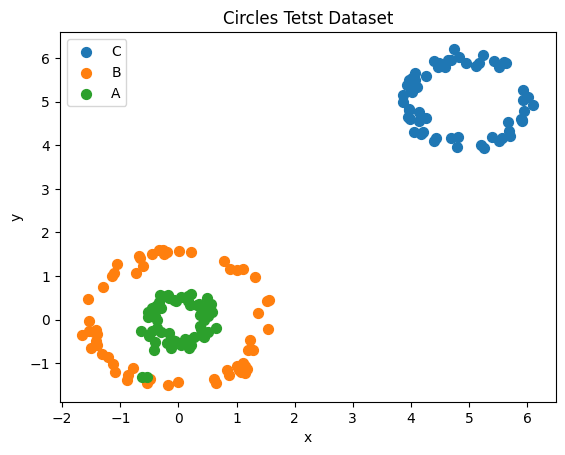

In [26]:
id2label = {0:"A",1:"B",2:"C"}

predictions = model.predict(X_test)
predictions = get_numeric_labels(predictions)
predictions

data_test['prediction'] = predictions
data_test['pred_labels'] = data_test['prediction'].map(id2label)

for label in data_test['pred_labels'].unique():
    x = data_test[data_test['pred_labels'] == label]['x']
    y = data_test[data_test['pred_labels'] == label]['y']

    plt.scatter(x,y,s=50,label=label)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Tetst Dataset")
plt.legend()